<a href="https://colab.research.google.com/github/DheerajKP1/15-puzzle/blob/master/yolov8_seg%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
import imutils
import math
from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import save_model

In [ ]:
'''!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1noAejnCZB0LPk6DA1o5")
project = rf.workspace("iit-kgp-hddfw").project("tyre-ylryk")
dataset = project.version(5).download("yolov8")'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

retrying...
retrying...
retrying...
retrying...
retrying...
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to tyre-5 in yolov8:: 100%|██████████| 592/592 [00:00<00:00, 4472.12it/s]


In [ ]:
'''from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/content/tyre-5/data.yaml', epochs=100, imgsz=640)'''

"from ultralytics import YOLO\n\n# Load a model\nmodel = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)\n\n# Train the model\nresults = model.train(data='/content/tyre-5/data.yaml', epochs=100, imgsz=640)"

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
path='/content/4 .jpg'
input_img=plt.imread(path)
model=YOLO('/content/drive/MyDrive/yolov8-seg/segment/train2/weights/best.pt')
result=model(path,save=True,save_txt=True,conf=0.7)[0]
if result.masks==None:
  result=model(path,save=True,save_txt=True)[0]
  if result.masks==None:
    print('roi not find')


o_path=f"{result.save_dir}/{path.split('/')[-1]}"
masked_img=plt.imread(o_path)


image 1/1 /content/4 .jpg: 640x480 1 roi, 222.3ms
Speed: 4.2ms preprocess, 222.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict24
1 label saved to runs/segment/predict24/labels


Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


Text(0.5, 1.0, 'Masked_img')

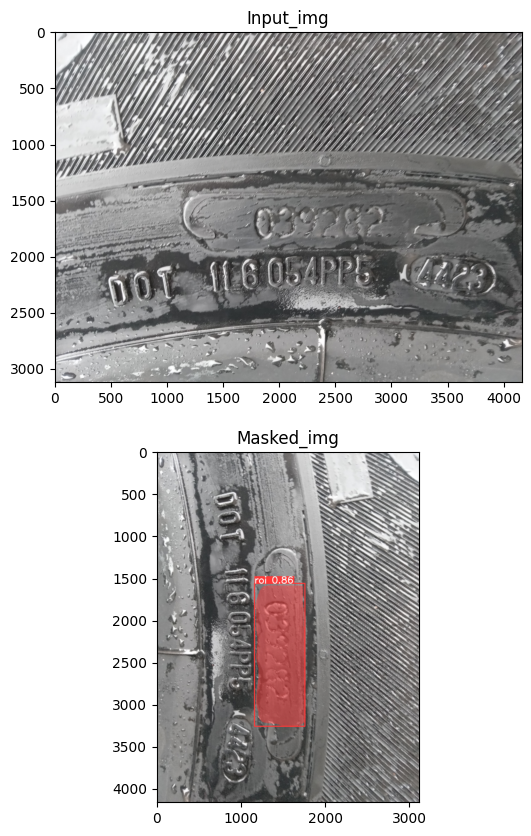

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(masked_img)
plt.subplot(2,1,1)
plt.imshow(input_img)
plt.title('Input_img')
plt.subplot(2,1,2)
plt.imshow(masked_img)
plt.title('Masked_img')

In [ ]:
H,W,_=masked_img.shape
print(H,W)

4160 3120


In [ ]:
for j,mask in enumerate(result.masks.data):
  #mask=mask.cuda()
  mask=mask.cpu().numpy()*255
  mask=cv.resize(mask,(W,H))
  cv.imwrite('/content/output3.jpg',mask)

In [ ]:
mask=plt.imread('/content/output3.jpg')
ret,thresh = cv.threshold(mask,100,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
max_cnt_index = max(range(len(contours)), key=lambda i: cv.contourArea(contours[i]))
cnt=contours[max_cnt_index]

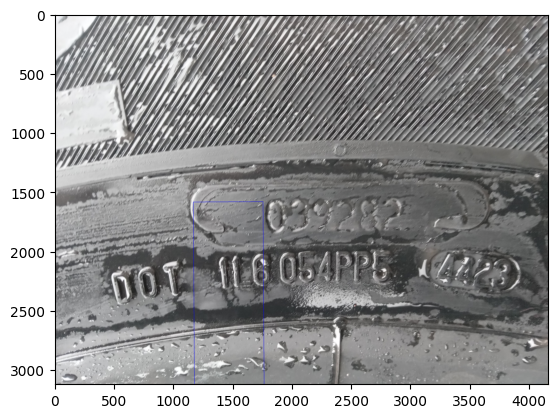

In [ ]:
img=plt.imread(path)
plt.imshow(img)
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
plt.imshow(cv.drawContours(img,[box],0,(0,0,255),2))

In [ ]:
box

array([[1167, 1585],
       [1755, 1582],
       [1765, 3268],
       [1177, 3271]])

In [ ]:
w=int(math.dist(box[0],box[1]))
h=int(math.dist(box[1],box[2]))
w,h

(588, 1686)

In [ ]:

def row_sum(box):
    return np.sum(box)
min_sum_index = min(range(len(box)), key=lambda i: row_sum(box[i]))

if (w<h):
  box = np.roll(box,-1,axis=0)
  min_sum_index-= 1
  print(box)


[[1755 1582]
 [1765 3268]
 [1177 3271]
 [1167 1585]]


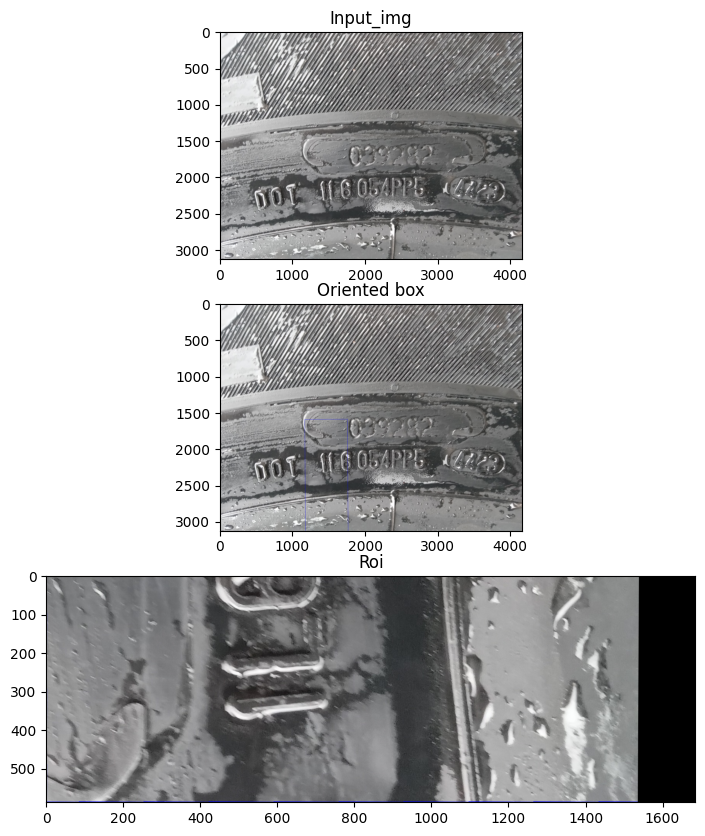

In [ ]:
w=int(math.dist(box[0],box[1]))
h=int(math.dist(box[1],box[2]))
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title('Input_img')
plt.imshow(input_img)
plt.subplot(3,1,2)
plt.title('Oriented box')
plt.imshow(img)
point1=np.float32(box)
point2=np.float32([[0,0],[w,0],[w,h],[0,h]])
M=cv.getPerspectiveTransform(point1,point2)
roi=cv.warpPerspective(img,M,(w,h))
plt.subplot(3, 1, 3)
plt.title("Roi")
plt.imshow(roi)

In [ ]:
'''
def rename_images(folder_path):
    # Change directory to the folder containing images
    os.chdir(folder_path)

    # Get a list of image files in the directory
    image_files = [f for f in os.listdir() if os.path.isfile(f) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]


    # Rename the image files to sequential numbers
    for idx, image_file in enumerate(image_files, start=1):
        file_extension = os.path.splitext(image_file)[1]
        new_filename = str(idx) + file_extension

        # Rename the file
        os.rename(image_file, new_filename)
        print(f"Renamed {image_file} to {new_filename}")

# Replace 'folder_path' with the path to the directory containing your images
folder_path = '/content/drive/MyDrive/original_tyre'
rename_images(folder_path)'''


'\ndef rename_images(folder_path):\n    # Change directory to the folder containing images\n    os.chdir(folder_path)\n\n    # Get a list of image files in the directory\n    image_files = [f for f in os.listdir() if os.path.isfile(f) and f.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\', \'.gif\', \'.bmp\'))]\n\n\n    # Rename the image files to sequential numbers\n    for idx, image_file in enumerate(image_files, start=1):\n        file_extension = os.path.splitext(image_file)[1]\n        new_filename = str(idx) + file_extension\n\n        # Rename the file\n        os.rename(image_file, new_filename)\n        print(f"Renamed {image_file} to {new_filename}")\n\n# Replace \'folder_path\' with the path to the directory containing your images\nfolder_path = \'/content/drive/MyDrive/original_tyre\'\nrename_images(folder_path)'

In [ ]:
# Function to get ROI and save images with the same image name in the output folder
def get_save_roi(input_folder, output_folder):
    model = YOLO('/content/drive/MyDrive/yolov8-seg/segment/train2/weights/best.pt')

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Check for image files
            file_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            result = model(file_path, save=True, save_txt=True, conf=0.5)[0]

            if result.masks is None:
                result = model(file_path, save=True, save_txt=True)[0]

            o_path = f"{result.save_dir}/{filename}"
            masked_img = plt.imread(o_path)
            H,W,_=masked_img.shape
            for j, mask in enumerate(result.masks.data):
                mask = mask.cpu().numpy() * 255
                mask = cv.resize(mask, (W, H))
                cv.imwrite('/content/output3.jpg', mask)

            mask = plt.imread('/content/output3.jpg')
            ret, thresh = cv.threshold(mask, 100, 255, 0)
            contours, hierarchy = cv.findContours(thresh, 1, 2)
            max_cnt_index = max(range(len(contours)), key=lambda i: cv.contourArea(contours[i]))
            cnt = contours[max_cnt_index]
            img = plt.imread(file_path)

            rect = cv.minAreaRect(cnt)
            box = cv.boxPoints(rect)
            box = np.int0(box)
            w=int(math.dist(box[0],box[1]))
            h=int(math.dist(box[1],box[2]))
            min_sum_index = min(range(len(box)), key=lambda i: np.sum(box[i]))

            if w < h:
                box = np.roll(box, -1, axis=0)
                min_sum_index -= 1

            w = int(math.dist(box[0], box[1]))
            h = int(math.dist(box[1], box[2]))

            point1 = np.float32(box)
            point2 = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
            M = cv.getPerspectiveTransform(point1, point2)
            roi = cv.warpPerspective(img, M, (w, h))

            cv.imwrite(output_path, roi)
            print(f"ROI saved for {filename} in {output_path}")

# Replace 'input_folder' and 'output_folder' with the paths to your input and output directories respectively
input_folder = '/content/drive/MyDrive/original_tyre'
output_folder = '/content/croped_images'

get_save_roi(input_folder, output_folder)



image 1/1 /content/drive/MyDrive/original_tyre/3.jpg: 480x640 1 roi, 346.3ms
Speed: 5.3ms preprocess, 346.3ms inference, 6.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict13
1 label saved to runs/segment/predict13/labels


KeyboardInterrupt: ignored

In [ ]:
#%mkdir /content/croped_images

In [ ]:
for filename in os.listdir('/content/drive/MyDrive/original_tyre'):
  print(filename)